# Data Exploration
In this file, we dive into our dataset and try to observe trends through visualizations.

### Importing Data

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ShainaBagri/SpotifyDataAnalysis/main/spotify_2010sHits.csv")
df

,index,topYear,rank,trackId,trackName,artistName,albumId,albumName,genres,popularity,tempo,energy,danceability,loudness,speechiness,instrumentalness,duration_ms,valence,explicit,duration_m,topGenre
0,0,2009,1,4kLLWz7srcuLKA7Et40PQR,I Gotta Feeling,Black Eyed Peas,1dgbFU08pXJXZhGPlybdMX,THE E.N.D. (THE ENERGY NEVER DIES) [Deluxe Ver...,"['dance pop', 'pop', 'pop dance', 'pop rap']",81,127.960,0.766,0.743,-6.375,0.0265,0.000000,289133,0.610,False,5.0,pop
1,1,2009,2,1QV6tiMFM6fSOKOGLMHYYg,Poker Face,Lady Gaga,1qwlxZTNLe1jq3b0iidlue,The Fame,"['dance pop', 'pop', 'pop dance']",77,118.999,0.806,0.851,-4.620,0.0787,0.000002,237200,0.787,False,4.0,pop
2,2,2009,3,4kgTdThcDHfuDS2kKxB7Lc,You Belong With Me,Taylor Swift,2gP2LMVcIFgVczSJqn340t,Fearless (Platinum Edition),"['dance pop', 'pop', 'pop dance']",61,129.964,0.771,0.687,-4.424,0.0384,0.000025,231146,0.445,False,4.0,pop
3,3,2009,4,0iGckQFyv6svOfAbAY9aWJ,Hot N Cold,Katy Perry,3OALgjCs6Lqw41853v4wEQ,One Of The Boys,"['dance pop', 'pop', 'pop dance', 'post-teen p...",71,132.032,0.841,0.706,-3.956,0.0418,0.000000,220226,0.861,False,4.0,pop
4,4,2009,5,3GpbwCm3YxiWDvy29Uo3vP,Right Round,Flo Rida,2vBLKFrI1rZqB7VtGxcsR5,R.O.O.T.S. (Route of Overcoming the Struggle),"['dance pop', 'miami hip hop', 'pop', 'pop dan...",74,124.986,0.672,0.720,-6.852,0.0551,0.000000,204640,0.705,False,3.0,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,94,2019,95,1wJRveJZLSb1rjhnUHQiv6,Swervin (feat. 6ix9ine),A Boogie Wit da Hoodie,3r5hf3Cj3EMh1C2saQ8jyt,Hoodie SZN,"['melodic rap', 'pop rap', 'rap', 'trap']",80,93.023,0.662,0.581,-5.239,0.3030,0.000000,189486,0.434,True,3.0,rap
1085,95,2019,96,5wIjM4q7oIgiLqn8Qfoyxh,Keisha & Becky - Remix,Russ Millions,5zab8YLQV8MOXSTpcK6mT3,Keisha & Becky (Remix),"['uk drill', 'uk hip hop']",68,140.969,0.471,0.863,-9.545,0.4780,0.000000,252906,0.644,True,4.0,hip hop
1086,96,2019,97,4SSnFejRGlZikf02HLewEF,bury a friend,Billie Eilish,0S0KGZnfBGSIssfF54WSJh,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","['electropop', 'pop']",79,120.046,0.389,0.905,-14.505,0.3320,0.162000,193143,0.196,False,3.0,pop
1087,97,2019,98,6UnCGAEmrbGIOSmGRZQ1M2,Light On,Maggie Rogers,5AHWNPo3gllDmixgAoFru4,Heard It In A Past Life,"['indie pop', 'pop']",73,102.054,0.569,0.657,-6.287,0.0542,0.000014,233880,0.399,False,4.0,pop


In [19]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pylab as pl
import seaborn as sns
sns.set()

### Plots
These are the visual plots we made to investigate our data.

Text(0.5, 0.98, 'Percentage of Explicit Hits')

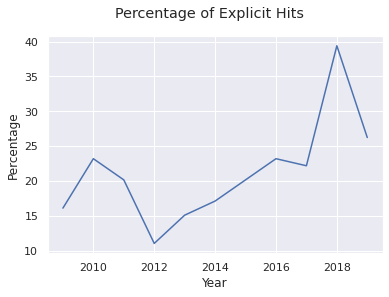

In [4]:
percentage = df.groupby("topYear")["explicit"].mean() * 100
ax = percentage.plot.line()
ax.set_ylabel("Percentage")
ax.set_xlabel("Year")
pl.suptitle("Percentage of Explicit Hits")

This plot visualizes the percentage of songs which were explicit in the hits playlists for each year. Let's compare these percentages to our current top 50.

In [5]:
data_dir = "https://raw.githubusercontent.com/ShainaBagri/SpotifyDataAnalysis/main/"
top50 = pd.read_csv(data_dir + "spotify_top50.csv")
percentNow = top50["explicit"].mean() * 100
print(str(percentNow) + "% of songs are explicit in today's US top 50 playlist")

68.0% of songs are explicit in today's US top 50 playlist


So the adults were right, today's music IS just a bunch of swearing!

Text(0.5, 0.98, 'Mean Popularity of Hits')

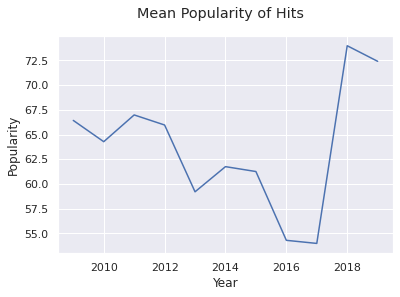

In [6]:
import pylab as pl
ax = df.groupby("topYear")["popularity"].mean().plot.line()
ax.set_ylabel("Popularity")
ax.set_xlabel("Year")
pl.suptitle("Mean Popularity of Hits")

This plot visualizes the average popularity of each song over the years. We were interested in how Spotify was able to quantify popularity into one number, and we wanted to see how their quantification measures the popularity of hits over the last 10 years.

Text(0.5, 0.98, 'Most Popular Artists of Hits from 2009 to 2019')

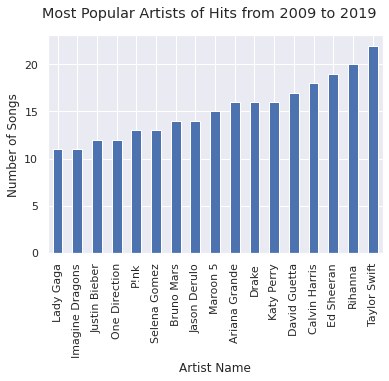

In [7]:
moreThan10 = df.groupby("artistName")["trackName"].count()[df.groupby("artistName")["trackName"].count() > 10]
ax = moreThan10.sort_values().plot.bar()
ax.set_ylabel("Number of Songs")
ax.set_xlabel("Artist Name")
pl.suptitle("Most Popular Artists of Hits from 2009 to 2019")

This plot visualizes the artists with the most hits from 2009 - 2019.

Text(0.5, 0.98, 'Distribution of Genre in Hits')

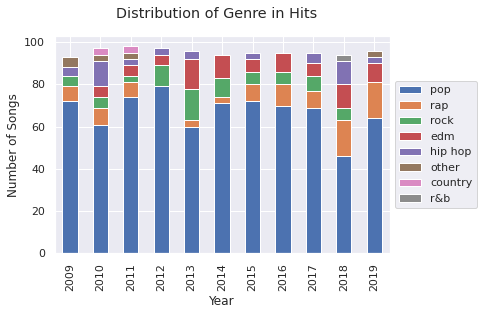

In [8]:
genre_year_distributions = df.groupby(["topYear", "topGenre"])["trackName"].count()[df.groupby(["topYear", "topGenre"])["trackName"].count() > 2].sort_values(ascending=False)
ax = genre_year_distributions.unstack().plot.bar(stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Number of Songs")
ax.set_xlabel("Year")
pl.suptitle("Distribution of Genre in Hits")

We wanted to investigate how genre popularity has changed over the years, and this plot groups the songs by genre and year to show how popular music taste has shifted (not much, pop has dominated).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0.98, "Means of Spotify's Metrics from 2009 to 2019")

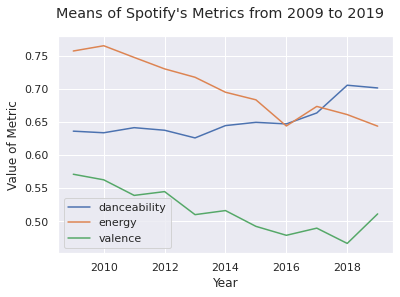

In [9]:
ax = df.groupby("topYear")["danceability", "energy", "valence"].mean().plot.line()
ax.set_ylabel("Value of Metric")
ax.set_xlabel("Year")
pl.suptitle("Means of Spotify's Metrics from 2009 to 2019")

This plot visualizes how the quantified metrics of songs have changed in the hits from 2009-2019.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0.98, 'Scatter Plot of Valence and Energy (larger size corresponds to higher rank)')

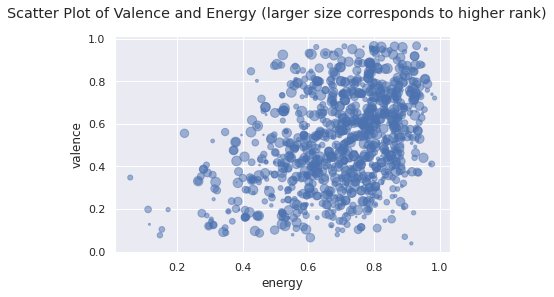

In [10]:
copy = df
copy["modRank"] = 100 - copy["rank"]
copy.plot.scatter(x='energy', y='valence', s='modRank', alpha=0.5)
pl.suptitle("Scatter Plot of Valence and Energy (larger size corresponds to higher rank)")

This plot highlights two key metrics, energy and valence, and uses rank to scale the size of bubbles. By doing this, we can observe how the most poplar songs tend to have 0.4-0.9 valence and 0.6-0.9 energy.

### WordCloud of Words in Song Titles
We thought it would be intersting to visualize the distributions of word usage in song titles, and a word bubble accomplishes this task.

In [11]:
wordsdf = pd.DataFrame()
wordsdf["word"] = []
wordsdf["num"] = []
found = 0
for i in range(1089):
  title_words = re.sub("[^\w]", " ",  df.iloc[i]["trackName"]).split()
  for word in title_words:
    for j in range(len(wordsdf.index)):
      if str(wordsdf.iloc[j]["word"]) == str(word.lower()):
        wordsdf["num"][j] += 1
        found = 1
    if not found:
      wordsdf.loc[len(wordsdf.index)] = [word.lower(), 1]
    found = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


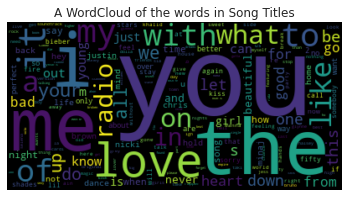

In [12]:
d = {}
wordsdf = wordsdf[wordsdf["word"] != "feat"]
wordsdf = wordsdf[wordsdf["word"] != "edit"]
wordsdf = wordsdf[wordsdf["word"] != "remix"]
wordsdf = wordsdf[wordsdf["word"] != "don"]
wordsdf = wordsdf[wordsdf["word"] != "t"] #These words had to be filtered out, because they were not directly a part of the song titles and cluttered the graphic

for i in range(len(wordsdf.index)):
  d[wordsdf["word"].iloc[i]] = wordsdf["num"].iloc[i]

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("A WordCloud of the words in Song Titles")
plt.show()

Here is the word bubble, showing that obvoious words do dominate, but some words like "love" and "radio" are larger than expected

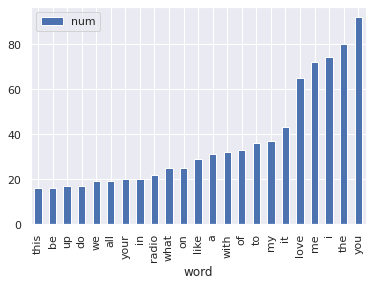

In [13]:
barword = wordsdf[wordsdf["num"] > 15].sort_values(by="num")
barword.set_index("word", inplace=True)
barword.plot.bar()

Here is a bar chart of those frequencies, confirming our observations in the word bubble.

### WordCloud of Words in Song Lyrics
We also thought it would be intersting to visualize the distributions of word usage in song lyrics.

In [14]:
!pip install lyricsgenius

     |████████████████████████████████| 61kB 3.0MB/s 


In [15]:
import lyricsgenius
GENIUS_ACCESS_TOKEN="FAO53ip5S_PPt4Lz3HWflepJcqyhMje0HwQWEAvDiHzGJsCQgXMGlK2bMLHJDKYP"
genius = lyricsgenius.Genius(GENIUS_ACCESS_TOKEN)

In [16]:
def bubbleLyrics(title, artist):
  song = genius.search_song(title, artist)
  lyrics = song.lyrics

  wordsdf = pd.DataFrame()
  wordsdf["word"] = []
  wordsdf["num"] = []
  found = 0

  title_words = re.sub("[^\w]", " ",  lyrics).split()
  for word in title_words:
    if len(word) > 1: #Left out one letter words, because they just add clutter to the visual
      for j in range(len(wordsdf.index)):
        if str(wordsdf.iloc[j]["word"]) == str(word.lower()):
          wordsdf["num"][j] += 1
          found = 1
      if not found:
        wordsdf.loc[len(wordsdf.index)] = [word.lower(), 1]
      found = 0

  d = {}
  for i in range(len(wordsdf.index)):
    d[wordsdf["word"].iloc[i]] = wordsdf["num"].iloc[i]
  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=d)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("A WordCloud of the Words in " + title + " By " + artist)
  plt.show()

Searching for "God's Plan" by Drake...
Done.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


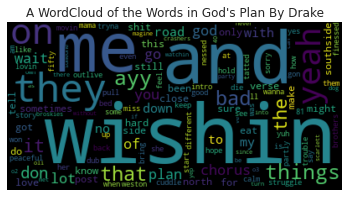

In [17]:
bubbleLyrics("God's Plan", "Drake")

Here is an example bubble of God's Plan by Drake

Searching for "Poker Face" by Lady Gaga...
Done.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


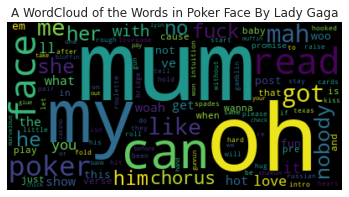

In [18]:
bubbleLyrics("Poker Face", "Lady Gaga")

Another example of Poker Face by Lady Gaga. Ignore the innapropriate words!